## Human Evolution. Introduction

This is a fun project which objective is to predict the genus and species of humans based on their physical charasteristics, time period, location and other features.
 
The dataset used here covers a wide range of characteristics of different human species, from the earliest consensual ancestors to modern Homo sapiens.

### Import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
import warnings
warnings.filterwarnings("ignore")

### Read the dataset

In [3]:
df = pd.read_csv('/kaggle/input/evolution-of-humans-datasets-for-clasification/Evolution_DataSets.csv')

## Initial Data Exploration

In [4]:
df.head()

,Genus_&_Specie,Time,Location,Zone,Current_Country,Habitat,Cranial_Capacity,Height,Incisor_Size,Jaw_Shape,...,biped,Arms,Foots,Diet,Sexual_Dimorphism,Hip,Vertical_Front,Anatomy,Migrated,Skeleton
0,hominino Orrorin tugenencin,6.041124,Africa,oriental,Kenya,forest,144.51410,110.24323,small,conical,...,low probability,climbing,climbing,dry fruits,high,wide,no,old,no,light
1,hominino Ardipithecus ramidus / kabadda,4.383910,Africa,oriental,Ethiopia,mixed,293.96021,107.69018,small,conical,...,high probability,climbing,climbing,soft fruits,medium-high,wide,no,old,no,light
2,Australopithecus Afarensis,3.749413,Africa,oriental,Kenya,mixed,264.79849,123.76644,big,U shape,...,yes,climbing,walk,dry fruits,high,slim,no,old,no,refined
3,Australopithecus Anamensis,4.595606,Africa,oriental,Kenya,forest-gallery,403.28047,111.40831,big,U shape,...,yes,climbing,climbing,dry fruits,high,wide,no,mixed,no,light
4,Australopithecus Africanus,3.614060,Africa,south,South Africa,forest-gallery,679.15233,111.59004,small,conical,...,yes,climbing,climbing,dry fruits,high,wide,yes,old,no,light


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 28 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Genus_&_Specie           12000 non-null  object 
 1   Time                     12000 non-null  float64
 2   Location                 12000 non-null  object 
 3   Zone                     12000 non-null  object 
 4   Current_Country          12000 non-null  object 
 5   Habitat                  12000 non-null  object 
 6   Cranial_Capacity         12000 non-null  float64
 7   Height                   12000 non-null  float64
 8   Incisor_Size             12000 non-null  object 
 9   Jaw_Shape                12000 non-null  object 
 10  Torus_Supraorbital       12000 non-null  object 
 11  Prognathism              12000 non-null  object 
 12  Foramen_Mágnum_Position  12000 non-null  object 
 13  Canine Size              12000 non-null  object 
 14  Canines_Shape         

In [6]:
df.describe()

,Time,Cranial_Capacity,Height
count,12000.000000,12000.000000,12000.000000
mean,2.532665,616.824303,131.452198
std,1.776998,356.275762,24.539191
min,0.000529,0.074910,80.009030
25%,1.050566,334.430993,112.986802
50%,2.317031,511.320200,125.508305
75%,3.656959,919.807697,153.877355
max,7.699417,1448.397470,184.981450


In [7]:
df.shape

(12000, 28)

In [8]:
df.duplicated().sum()

0

In [9]:
target = "Genus_&_Specie"
df[target].value_counts()

Genus_&_Specie
hominino Orrorin tugenencin                500
hominino Ardipithecus ramidus / kabadda    500
Paranthropus Robustus                      500
Australopithecus Garhi                     500
Australopithecus Bahrelghazali             500
Homo Georgicus                             500
Australopithecus Sediba                    500
Homo Ergaster                              500
Homo Antecesor                             500
Homo Sapiens                               500
Homo Habilis                               500
Homo Rudolfensis                           500
Paranthropus Boisei                        500
Homo Floresiensis                          500
Homo Naledi                                500
Homo Erectus                               500
Paranthropus Aethiopicus                   500
Homo Neanderthalensis\n                    500
hominino Sahelanthropus tchadensis         500
Homo Rodhesiensis                          500
Australopithecus Africanus                 50

### Observations from Initial Data Exploration:
- dataset looks clean:
    - without missing values
    - no duplicates
- there are a lot of categorical values that need to be converted
- target column has the same number of samples for each category, it means it's well balanced.

## Exploratory Data Analysis

### Distribution of numerical columns

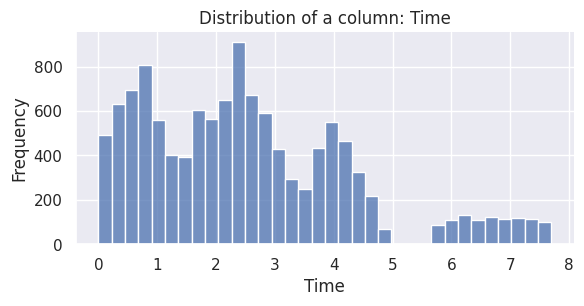

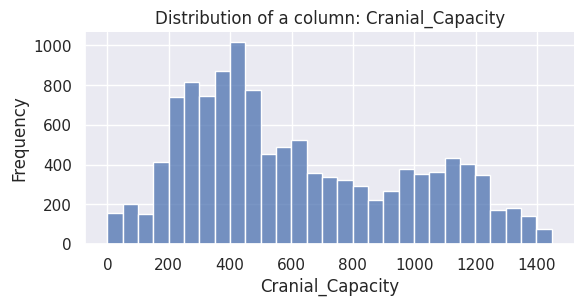

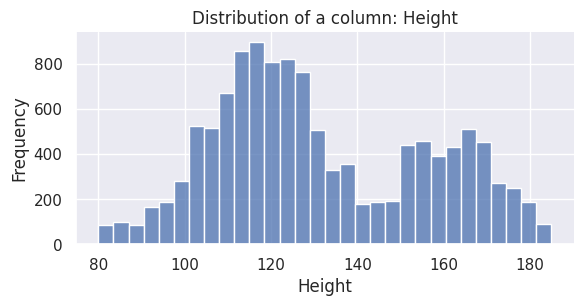

In [10]:
sns.set_theme()

# Extracting numerical columns from the dataframe
numerical_cols = df.columns[df.dtypes != object]

# Iterate over each numerical column for plotting its distribution
for column in numerical_cols:
    
    # Plotting distribution using seaborn's displot function
    sns.displot(df[column], height=3, aspect=2)
    
    # Adding y-axis label and title 
    plt.ylabel('Frequency')
    plt.title('Distribution of a column: {}'.format(column.title()))
    
    plt.show()

### Counts of observations in each categorical column

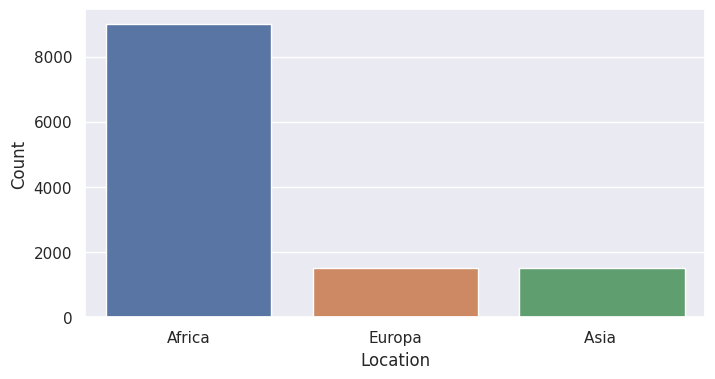

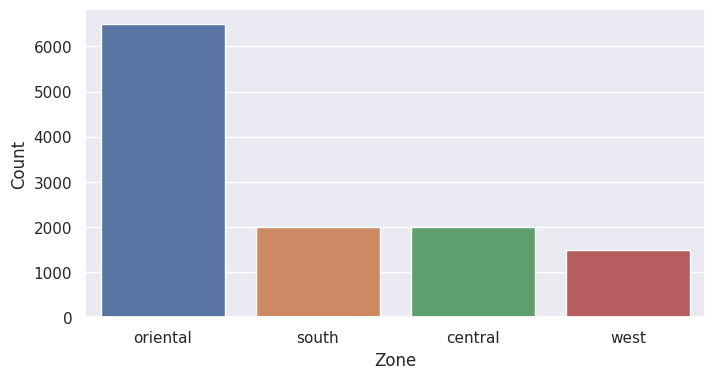

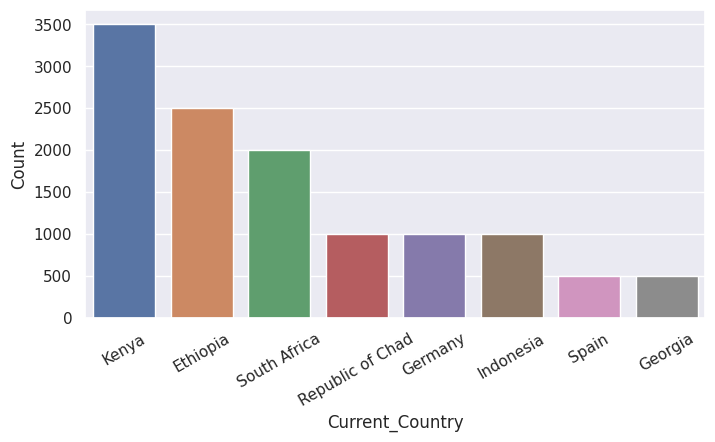

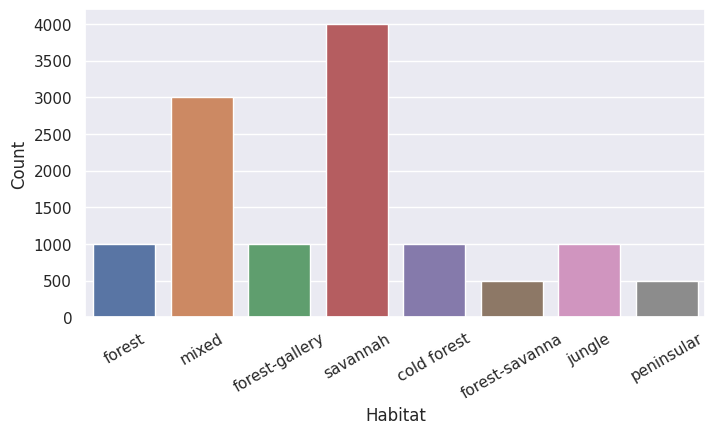

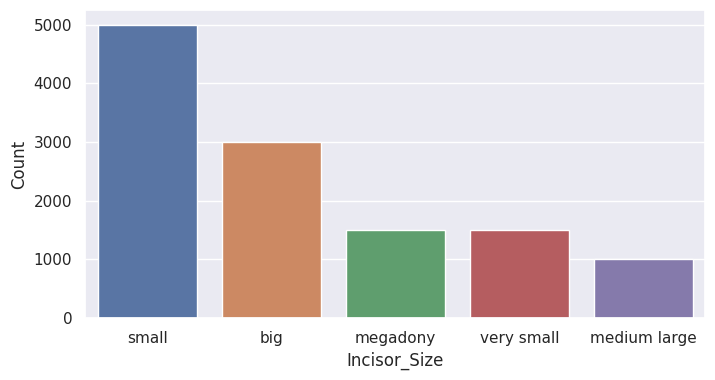

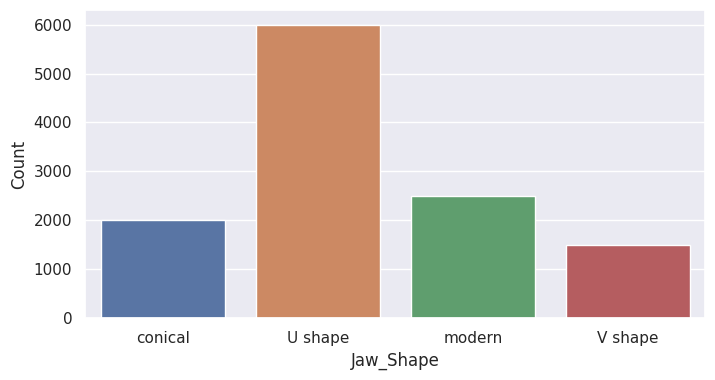

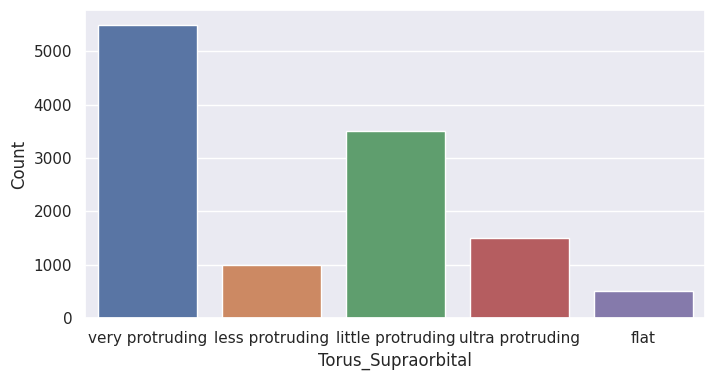

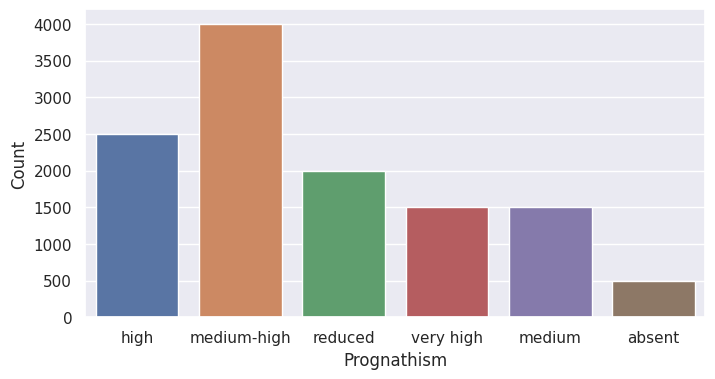

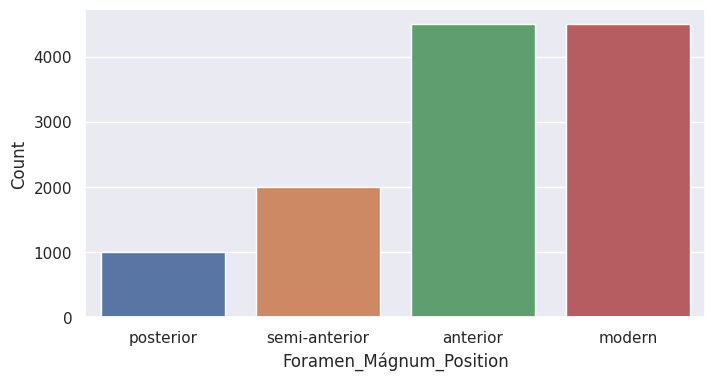

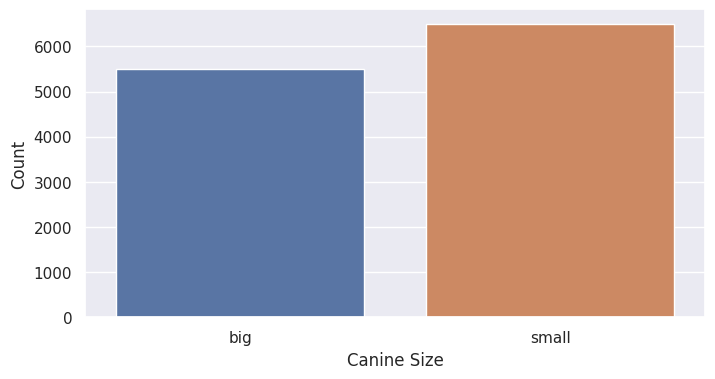

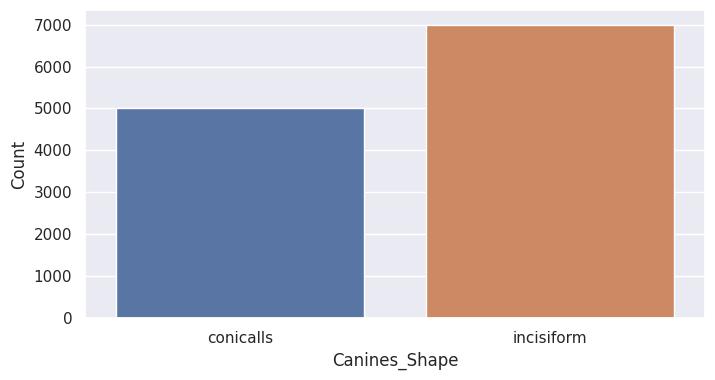

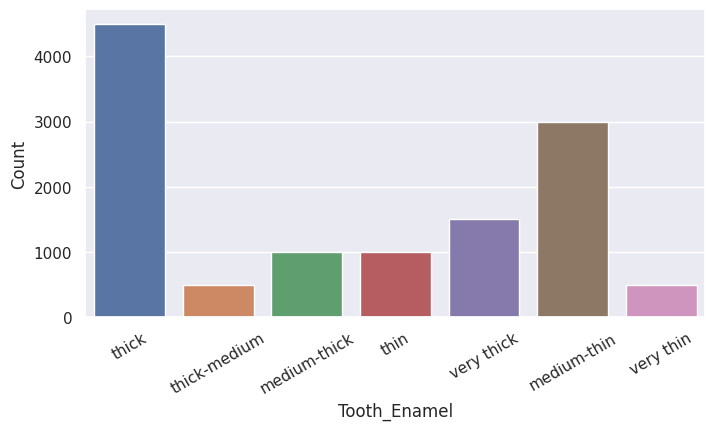

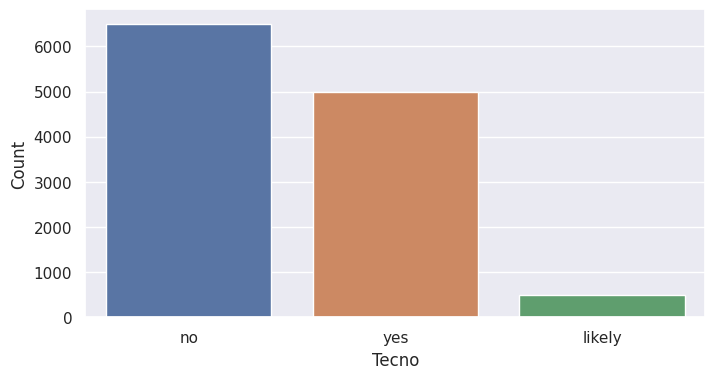

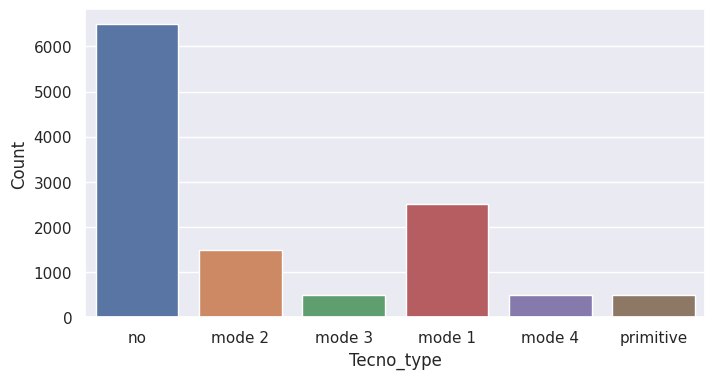

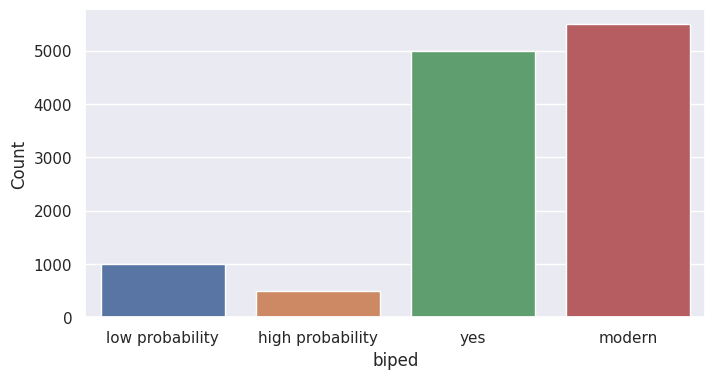

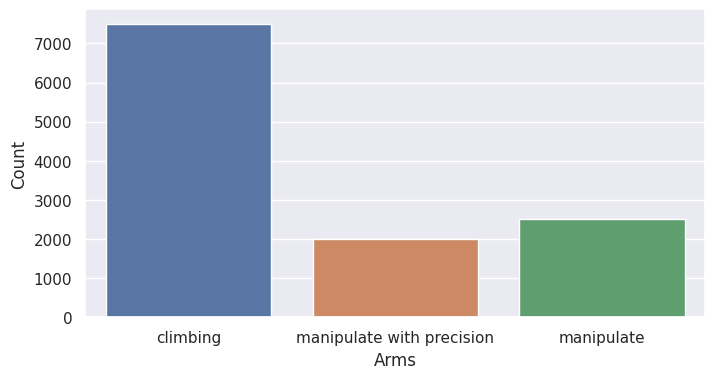

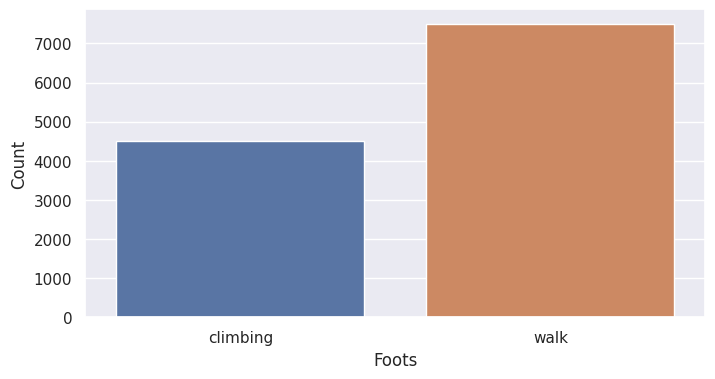

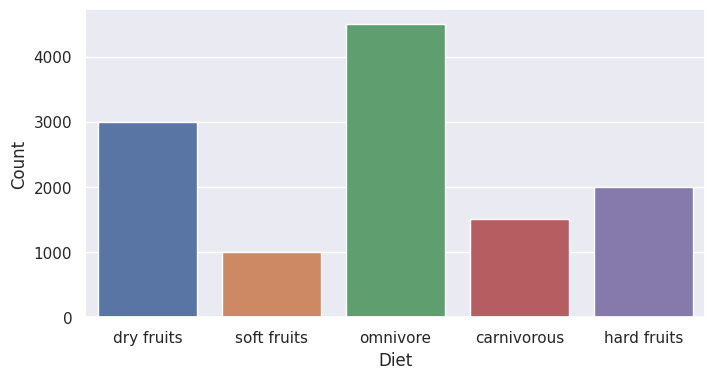

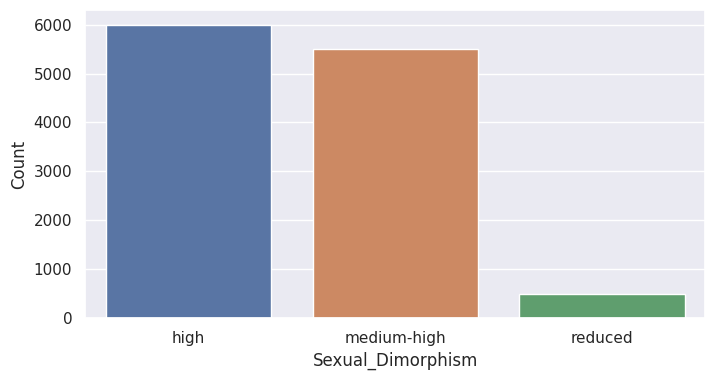

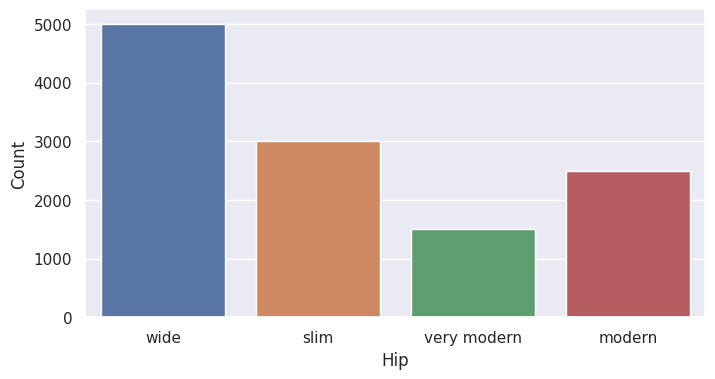

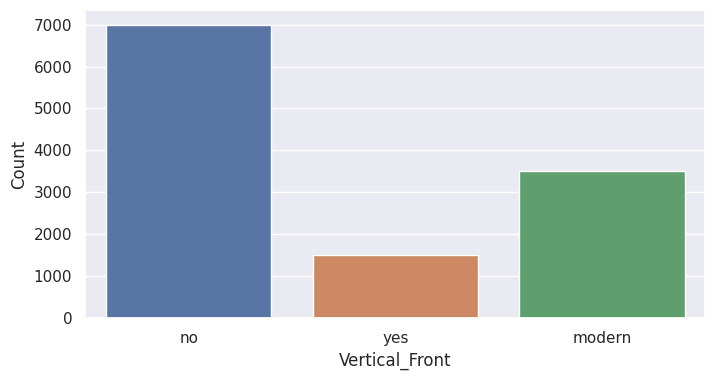

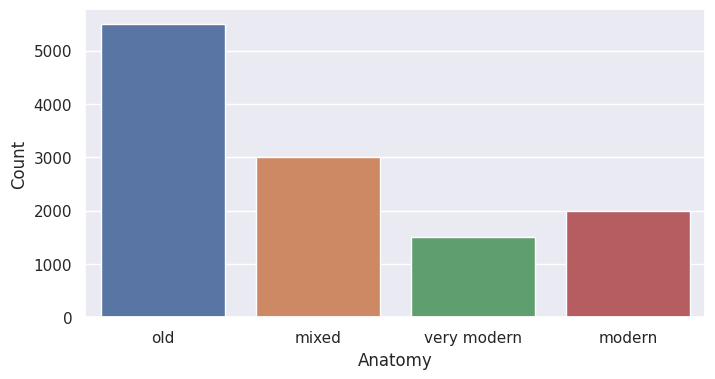

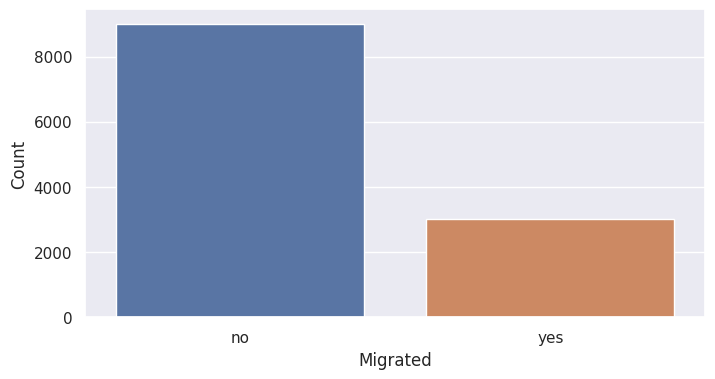

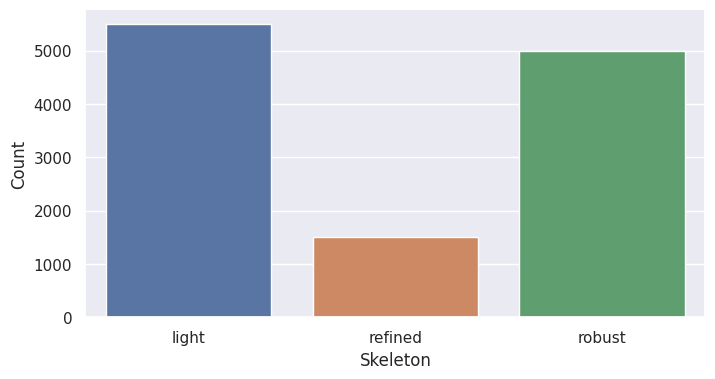

In [11]:
# Extracting categorical columns from the dataframe
categorical_cols = df.columns[df.dtypes == object]

# Iterate over each numerical column for plotting its countplot
for column in categorical_cols[1:]:
    
    # setting the dimensions of the plot
    fig, ax = plt.subplots(figsize=(8, 4))
    
    # Plotting countplot
    sns.countplot(data=df, x=column)
    
    # Adding y-axis label and title 
    plt.ylabel('Count')
    
    # Rotating x-axis labels for long labels
    long_labels = "Tooth_Enamel", "Current_Country", "Habitat"
    if column in long_labels:
        plt.xticks(rotation=30)
    
    plt.show()

### Correlation of Numerical Features

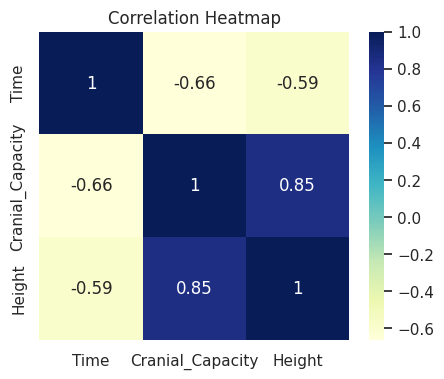

In [12]:
plt.figure(figsize=(5, 4))

# Compute correlation matrix for numeric features
corr_matrix = df.corr(numeric_only=True)

# Plot heatmap with annotations
sns.heatmap(corr_matrix, cmap='YlGnBu', annot=True)

# Set title for the plot
plt.title('Correlation Heatmap')

plt.show()

### Observations from Exploratory Data Analysis:
- **Temporal Distribution**: The majority of observations in our dataset span the last 4.5 million years, with some extending up to 7.7 million years.
- **Height Distribution**: The distribution of heights has a binomial pattern, with peaks around 115 and 165 cm. 
- **Geographical Distribution**: The dataset is heavily concentrated in regions such as Kenya, Ethiopia, and South Africa, indicating a bias towards these areas in terms of fossil discoveries or research efforts.
- **Diet Composition**: Among the observed dietary habits, omnivory appears to be the most frequent, followed closely by a diet rich in dry fruits. This suggests a diverse range of dietary adaptations among the observed species.
- **Correlation Analysis**: There is a notable correlation between certain numerical features. Specifically, Cranial Capacity shows a strong positive correlation with height, indicating a potential relationship between brain size and body size. Additionally, there is a moderate negative correlation between time and both Cranial Capacity and height, suggesting potential evolutionary trends over time.

## Feature Engineering

In [13]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split

In [14]:
# Set a variable X to the features of the dataframe and y to the target column.
X = df.iloc[:, 1:]
y = df.iloc[:, 0]

In [15]:
# Create the preprocessing pipelines for both numeric and categorical data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),
        ('cat', OneHotEncoder(), categorical_cols[1:])
    ])

# Apply transformations
X_processed = preprocessor.fit_transform(X)

In [16]:
# Create a LabelEncoder object
label_encoder = LabelEncoder()

# Encode the target variable
y_encoded = label_encoder.fit_transform(y.values.ravel())       # Note that ravel() function flattens the vector.

In [17]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_processed, y_encoded, test_size=0.3, random_state=42)

## K-Nearest Neighbor 

Now it's time to train our model! KNN is a straightforward but very effective model that can be used for both classification and regression tasks.

#### Estimate KNN model and report outcomes

In [18]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score, f1_score

knn = KNeighborsClassifier(n_neighbors=3)  # Instantiate the KNeighborsClassifier
knn.fit(X_train, y_train)  # Fit the model with training data
y_pred = knn.predict(X_test)  # Predict using the test data

# Precision, recall, f-score from the multi-class support function
print(classification_report(y_test, y_pred)) 
print('Accuracy score: ', round(accuracy_score(y_test, y_pred), 2))  
print('F1 Score: ', round(f1_score(y_test, y_pred, average='weighted'), 2)) 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       151
           1       1.00      1.00      1.00       142
           2       1.00      1.00      1.00       162
           3       1.00      1.00      1.00       155
           4       1.00      1.00      1.00       148
           5       1.00      1.00      1.00       139
           6       1.00      1.00      1.00       146
           7       1.00      1.00      1.00       139
           8       1.00      1.00      1.00       175
           9       1.00      1.00      1.00       155
          10       1.00      1.00      1.00       150
          11       1.00      1.00      1.00       146
          12       1.00      1.00      1.00       140
          13       1.00      1.00      1.00       128
          14       1.00      1.00      1.00       152
          15       1.00      1.00      1.00       149
          16       1.00      1.00      1.00       155
          17       1.00    